In [1]:
# import data and store in arrays

import csv

noga_str = './data/data_no_ga.csv'
ga_str = './data/data_ga.csv'

noga_file = open(noga_str)
csv_noga = csv.reader(noga_file)
ga_file = open(ga_str)
csv_ga = csv.reader(ga_file)

noga = []

for row in csv_noga:
    if (row[0] != ' '):
        noga.insert(len(noga), [row[0], row[3]])
        
noga = noga[1:len(noga)]
        
ga = []

for row in csv_ga:
    if (row[0] != ' '):
        ga.insert(len(ga), [row[0], row[3]])
        
ga = ga[1:len(ga)]

In [2]:
# put data into separate arrays for each subject

noga_data = [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10'], ['11']]

for i in range(0, len(noga_data)):
    for j in range(0, len(noga)):
        if (noga_data[i][0] == noga[j][0]):
            noga_data[i].insert(len(noga_data[i]), int(noga[j][1]))
            
ga_data = [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10'], ['11']]

for i in range(0, len(ga_data)):
    for j in range(0, len(ga)):
        if (ga_data[i][0] == ga[j][0]):
            ga_data[i].insert(len(ga_data[i]), int(ga[j][1]))

In [3]:
# ANOVA
#
# ANOVA is a form of statistical hypothesis testing heavily used in the analysis of experimental data.
# A test result (calculated from the null hypothesis and the sample) is called statistically significant
# if it is deemed unlikely to have occurred by chance, assuming the truth of the null hypothesis.
# A statistically significant result, when a probability (p-value) is less than a pre-specified threshold
# (significance level), justifies the rejection of the null hypothesis, but only if the a priori probability
# of the null hypothesis is not high.
#
# In the typical application of ANOVA, the null hypothesis is that all groups are random samples from the same population.
#
# The fixed-effects model (class I) of analysis of variance applies to situations in which the experimenter
# applies one or more treatments to the subjects of the experiment to see whether the response variable values
# change. This allows the experimenter to estimate the ranges of response variable values that the treatment would
# generate in the population as a whole.
#
# (Wikipedia)

from scipy import stats
 
alpha = 0.05 # significance level

for i in range(0, len(noga_data)):
    F, p = stats.f_oneway(noga_data[i][1:len(noga_data[i])], ga_data[i][1:len(ga_data[i])])

    if (p <= alpha):
        # It is unlikely that the results have occurred by chance.
        print(i+1, 'P-value ≤ α: The differences between some of the means are statistically significant:', p)
    elif (p > alpha):
        # It is likely that the results have occurred by chance.
        print(i+1, 'P-value > α: The differences between the means are not statistically significant:', p)

1 P-value ≤ α: The differences between some of the means are statistically significant: 1.5758238099378884e-39
2 P-value ≤ α: The differences between some of the means are statistically significant: 1.0790264323198062e-20
3 P-value ≤ α: The differences between some of the means are statistically significant: 0.0018502644728260187
4 P-value ≤ α: The differences between some of the means are statistically significant: 2.117597389158675e-06
5 P-value ≤ α: The differences between some of the means are statistically significant: 1.879505041166297e-09
6 P-value ≤ α: The differences between some of the means are statistically significant: 4.833426547241296e-06
7 P-value ≤ α: The differences between some of the means are statistically significant: 0.0001192927443068501
8 P-value ≤ α: The differences between some of the means are statistically significant: 1.893887465622117e-129
9 P-value > α: The differences between the means are not statistically significant: 0.5564925539926373
10 P-value ≤ α

In [4]:
# If your entire model is statistically significant, that's great news!
# However, be sure to check the residual plots so you can trust the results!

import numpy as np
import seaborn as sns

for i in range(0, len(noga_data)):
    x = noga_data[i][1:len(noga_data[i])]
    y = ga_data[i][1:len(ga_data[i])]

    # Plot the residuals after fitting a linear model
    sns.residplot(x, y)

In [7]:
# Paired T-test

# The paired sample t-test, sometimes called the dependent sample t-test, is a statistical procedure
# used to determine whether the mean difference between two sets of observations is zero. In a paired
# sample t-test, each subject or entity is measured twice, resulting in pairs of observations. Common
# applications of the paired sample t-test include case-control studies or repeated-measures designs.
# Suppose you are interested in evaluating the effectiveness of a company training program. One approach
# you might consider would be to measure the performance of a sample of employees before and after
# completing the program, and analyze the differences using a paired sample t-test.
# https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/

import statistics as st
import scipy.stats as stats

for i in range(0, len(noga_data)):
    x = noga_data[i][1:len(noga_data[i])]
    y = ga_data[i][1:len(ga_data[i])]
    difference = []

    for j in range (0, len(x)):
        difference.append(x[j] - y[j])

    mean = st.mean(difference)
    stdev = st.stdev(difference)
    pairedt, p = stats.ttest_rel(x, y)

    # print('mean', mean)
    # print('stdev', stdev)

    if (p <= alpha):
        # The difference between the values before and the values after the experiment is carried out are statistically significant.
        print(i+1, 'P-value ≤ α: The differences between some of the means are statistically significant:', p)
    elif (p > alpha):
        # The difference between the values before and the values after the experiment is carried out are not statistically significant.
        print(i+1, 'P-value > α: The differences between the means are not statistically significant:', p)

1 P-value ≤ α: The differences between some of the means are statistically significant: 2.6473369111631188e-30
2 P-value ≤ α: The differences between some of the means are statistically significant: 1.1714079012719297e-14
3 P-value ≤ α: The differences between some of the means are statistically significant: 0.0024996753946632776
4 P-value ≤ α: The differences between some of the means are statistically significant: 8.5218816208165e-05
5 P-value ≤ α: The differences between some of the means are statistically significant: 5.853166628982877e-11
6 P-value ≤ α: The differences between some of the means are statistically significant: 7.608739521691577e-06
7 P-value ≤ α: The differences between some of the means are statistically significant: 2.5417018565466094e-05
8 P-value ≤ α: The differences between some of the means are statistically significant: 9.264269289967523e-74
9 P-value > α: The differences between the means are not statistically significant: 0.5854312093278129
10 P-value ≤ α: 

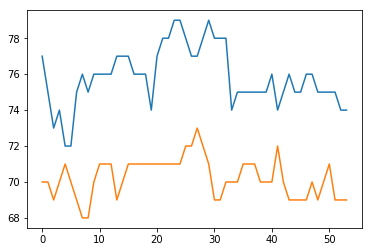

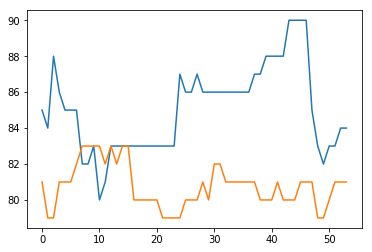

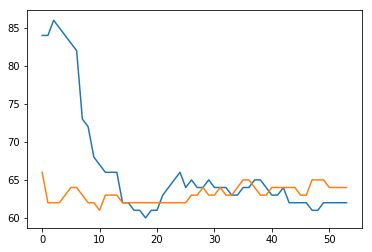

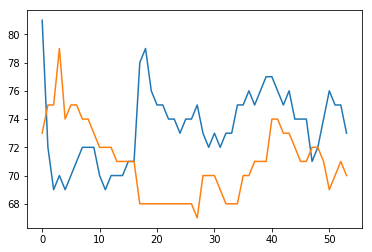

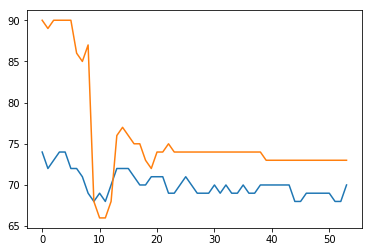

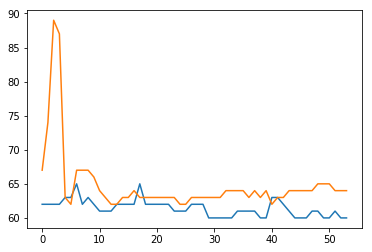

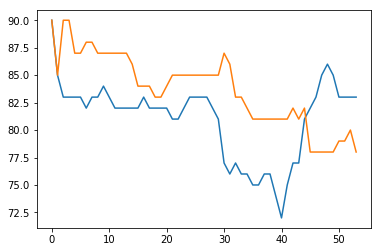

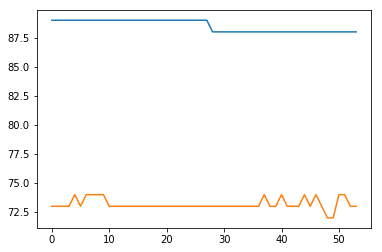

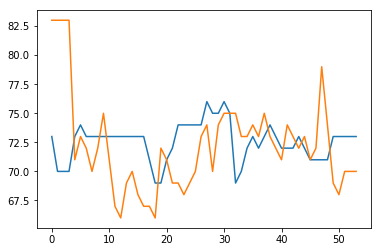

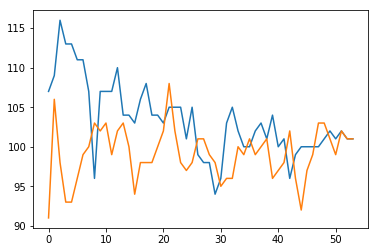

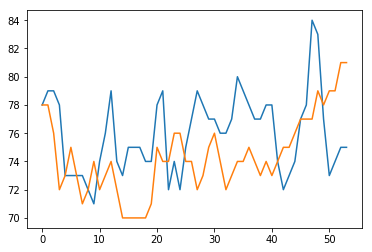

In [13]:
# Graphs

import matplotlib.pyplot as plt

for i in range(0, len(noga_data)):
    x = noga_data[i][1:len(noga_data[i])]
    y = ga_data[i][1:len(ga_data[i])]
    plt.plot(x)
    plt.plot(y)
    plt.show()

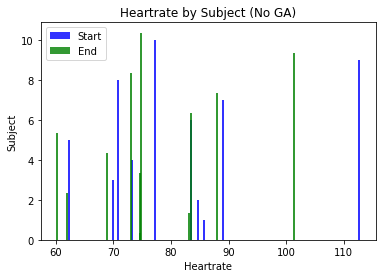

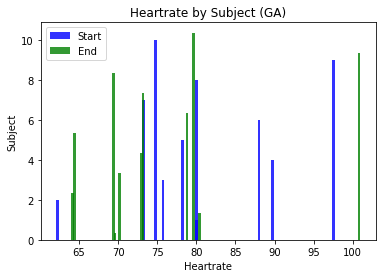

In [40]:
# Heartrate by Subject (No GA)

# bar chart x=HR, y=subjects
n_groups = len(noga_data)
means_start = []
means_end = []

for i in range(0, len(noga_data)):
    x = noga_data[i][1:len(noga_data[i])]
    means_start.append(st.mean(x[1:5]))
    means_end.append(st.mean(x[len(x)-5:len(x)]))
    
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(means_start, index, bar_width, alpha=opacity, color='b', label='Start')
rects2 = plt.bar(means_end, index + bar_width, bar_width, alpha=opacity, color='g', label='End')

plt.xlabel('Heartrate')
plt.ylabel('Subject')
plt.title('Heartrate by Subject (No GA)')
plt.legend()

plt.show()


# Heartrate by Subject (GA)

# bar chart x=HR, y=subjects
n_groups = len(ga_data)
means_start = []
means_end = []

for i in range(0, len(ga_data)):
    x = ga_data[i][1:len(ga_data[i])]
    means_start.append(st.mean(x[1:5]))
    means_end.append(st.mean(x[len(x)-5:len(x)]))
    
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(means_start, index, bar_width, alpha=opacity, color='b', label='Start')
rects2 = plt.bar(means_end, index + bar_width, bar_width, alpha=opacity, color='g', label='End')

plt.xlabel('Heartrate')
plt.ylabel('Subject')
plt.title('Heartrate by Subject (GA)')
plt.legend()

plt.show()

C:\Users\Alessia\AppData\Local\conda\conda\envs\alessia\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Alessia\AppData\Local\conda\conda\envs\alessia\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Alessia

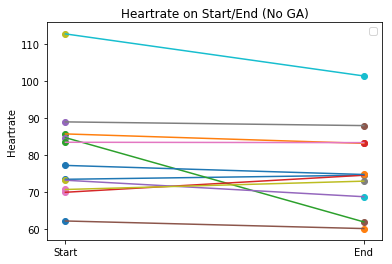

C:\Users\Alessia\AppData\Local\conda\conda\envs\alessia\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Alessia\AppData\Local\conda\conda\envs\alessia\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Alessia

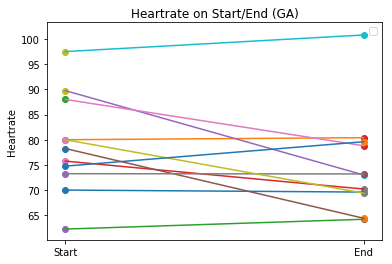

In [96]:
# Heartrate on Start/End (No GA)

means_start = []
means_end = []

for i in range(0, len(noga_data)):
    x = noga_data[i][1:len(noga_data[i])]
    means_start.append(st.mean(x[1:5]))
    means_end.append(st.mean(x[len(x)-5:len(x)]))

    plt.scatter(0, means_start[i])
    plt.scatter(1, means_end[i])
    plt.plot([means_start[i], means_end[i]])

    plt.xticks([0, 1])
    plt.axes().set_xticklabels(['Start', 'End'])
    
plt.ylabel('Heartrate')
plt.title('Heartrate on Start/End (No GA)')
plt.legend()
    
plt.show()
    
    
# Heartrate on Start/End (GA)

means_start = []
means_end = []

for i in range(0, len(ga_data)):
    x = ga_data[i][1:len(ga_data[i])]
    means_start.append(st.mean(x[1:5]))
    means_end.append(st.mean(x[len(x)-5:len(x)]))

    plt.scatter(0, means_start[i])
    plt.scatter(1, means_end[i])
    plt.plot([means_start[i], means_end[i]])

    plt.xticks([0, 1])
    plt.axes().set_xticklabels(['Start', 'End'])
    
plt.ylabel('Heartrate')
plt.title('Heartrate on Start/End (GA)')
plt.legend()
    
plt.show()

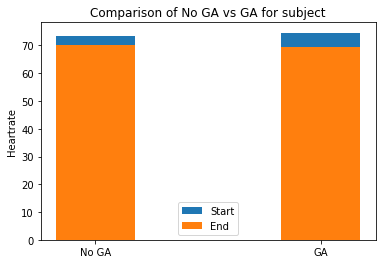

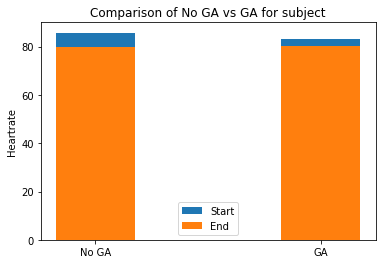

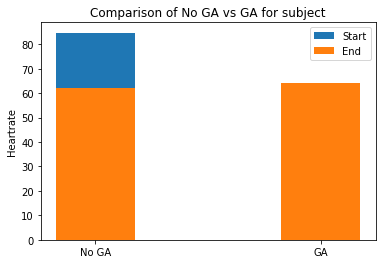

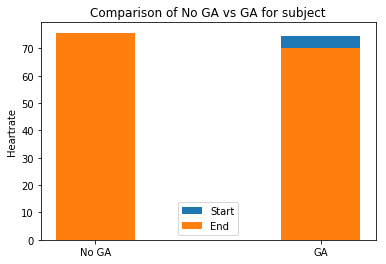

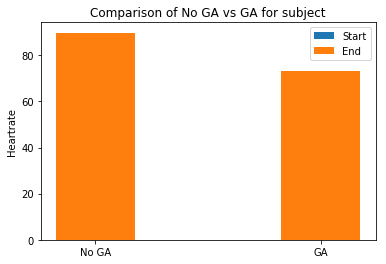

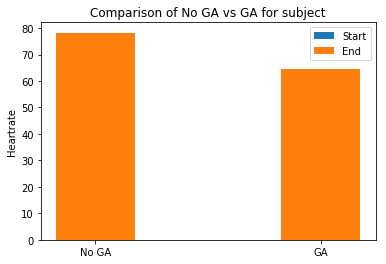

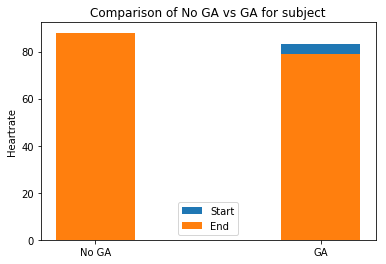

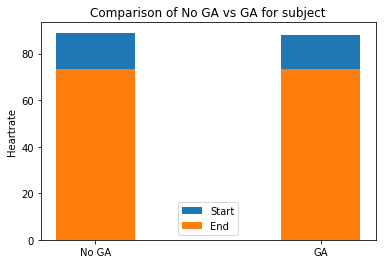

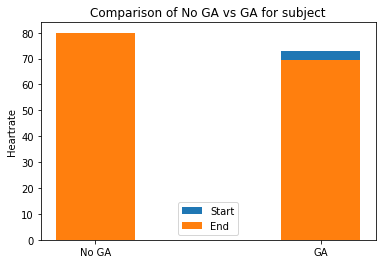

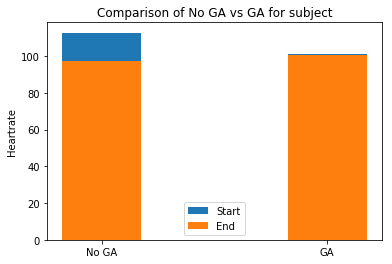

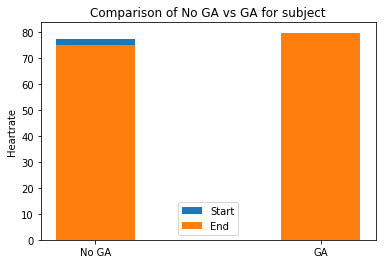

In [103]:
# Measurement of No GA vs GA for each subject

for i in range(0, len(noga_data)):
    means_noga = []    
    x = noga_data[i][1:len(noga_data[i])]
    means_noga.append(st.mean(x[1:5]))
    means_noga.append(st.mean(x[len(x)-5:len(x)]))

    means_ga = []
    x = ga_data[i][1:len(ga_data[i])]
    means_ga.append(st.mean(x[1:5]))
    means_ga.append(st.mean(x[len(x)-5:len(x)]))
    
    ind = [0, 1]    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, means_noga, width)
    p2 = plt.bar(ind, means_ga, width)

    plt.ylabel('Heartrate')
    plt.title('Comparison of No GA vs GA for subject')
    plt.xticks(ind, ('No GA', 'GA'))
    plt.legend((p1[0], p2[0]), ('Start', 'End'))

    plt.show()